In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# 设置中文字体
plt.rcParams['font.sans-serif']=['SimHei']
#显示负号
matplotlib.rcParams['axes.unicode_minus']=False

# 2、使用示例：

### 示例 1：在FancyArrowPatch中使用ArrowStyle

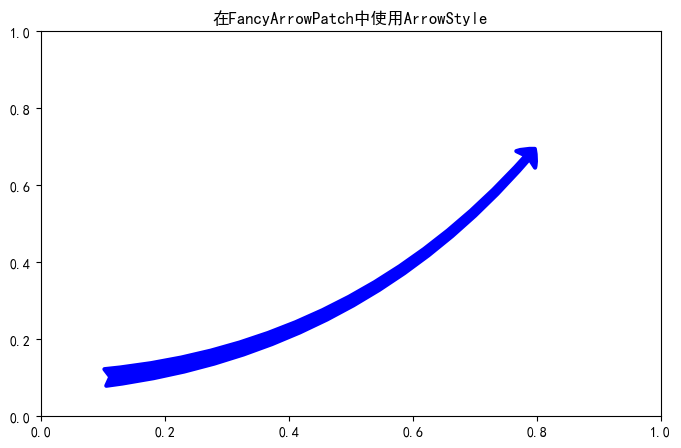

In [3]:
from matplotlib.patches import FancyArrowPatch,ArrowStyle

fig, ax = plt.subplots(figsize=(8, 5))

# 创建起点和终点坐标
posA = (0.1, 0.1)
posB = (0.8, 0.7)

# 创建带有自定义箭头样式的FancyArrowPatch
arrow = FancyArrowPatch(
    posA=posA, 
    posB=posB,
    arrowstyle=ArrowStyle.Fancy(
        head_length=0.5, 
        head_width=0.9, 
        tail_width=0.6
    ),
    connectionstyle="arc3,rad=0.2",
    color="blue",
    linewidth=3,
    mutation_scale=20  # 控制箭头大小
)

ax.add_patch(arrow)
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
plt.title("在FancyArrowPatch中使用ArrowStyle")
plt.show()

### 示例 2：在annotate中使用ArrowStyle

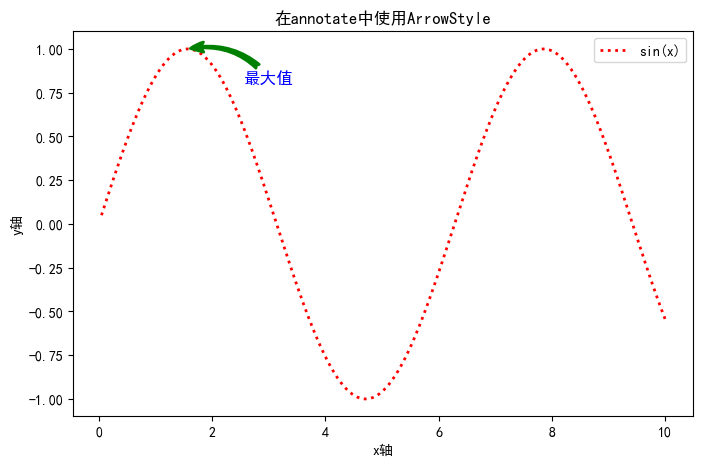

In [4]:
from matplotlib.patches import ArrowStyle

x = np.linspace(0.05, 10, 1000)
y = np.sin(x)

plt.figure(figsize=(8, 5))
plt.plot(x, y, label="sin(x)", ls=":", c="red", lw=2)

# 使用ArrowStyle自定义注解箭头
plt.annotate(
    "最大值", 
    xy=(np.pi/2, 1.0), 
    xytext=(np.pi/2+1, 0.8),
    color="blue",
    weight="bold",
    fontsize=12,
    arrowprops=dict(
        arrowstyle=ArrowStyle("Fancy, head_length=0.8, head_width=0.6, tail_width=0.3"),
        connectionstyle="arc3,rad=0.3",
        color="green",
        lw=2
    )
)

plt.xlabel("x轴")
plt.ylabel("y轴")
plt.title("在annotate中使用ArrowStyle")
plt.legend()
plt.show()

我们可以继承ArrowStyle类来创建完全自定义的箭头样式：

In [5]:
from matplotlib.patches import ArrowStyle
import matplotlib.path as mpath

class MyCustomArrow(ArrowStyle._Base):
    """
    自定义箭头样式类
    """
    def __init__(self, head_length=0.4, head_width=0.2, tail_width=0.1):
        self.head_length = head_length
        self.head_width = head_width
        self.tail_width = tail_width
        super().__init__()
    
    def _get_arrow_wedge(self, path, mutation_size, linewidth):
        # 定义箭头形状
        verts = [
            (0, 0),                                   # 起点
            (-self.head_length, self.head_width/2),    # 上顶点
            (-self.head_length*0.6, 0),               # 中间凹陷点
            (-self.head_length, -self.head_width/2),  # 下顶点
            (0, 0)                                    # 回到起点
        ]
        
        codes = [mpath.Path.MOVETO,
                 mpath.Path.LINETO,
                 mpath.Path.LINETO,
                 mpath.Path.LINETO,
                 mpath.Path.CLOSEPOLY]
        
        path = mpath.Path(verts, codes)
        return path, True

# 注册自定义样式
ArrowStyle._style_list["my_custom"] = MyCustomArrow

# 使用自定义样式
plt.figure(figsize=(6, 4))
ax = plt.gca()

ax.annotate('完全自定义箭头', xy=(0.5, 0.5), xytext=(0.2, 0.5),
            arrowprops=dict(arrowstyle="my_custom", color='green', lw=2))

plt.title("完全自定义箭头样式示例")
plt.axis('off')
plt.show()

<Figure size 600x400 with 1 Axes>